In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploring data:
#### **`cwur.csv`**

In [2]:
cwur_data = pd.read_csv(r"./Data/cwurData.csv")
cwur_data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [3]:
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [4]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {cwur_data.duplicated().sum()}')

# Percentage of missing values in each column
cwur_data.isna().sum() / cwur_data.shape[0] * 100

Number of duplicated rows: 0


world_rank              0.000000
institution             0.000000
country                 0.000000
national_rank           0.000000
quality_of_education    0.000000
alumni_employment       0.000000
quality_of_faculty      0.000000
publications            0.000000
influence               0.000000
citations               0.000000
broad_impact            9.090909
patents                 0.000000
score                   0.000000
year                    0.000000
dtype: float64

In this data table:
- There are **2200 rows** and **14 columns**.
- Each row shows annual scores, ranks, and some other information of an university (from 2012 to 2015).
- Meaning of each colum according to data description and its datatype:
    - `world_rank` [**int**]: world rank for university
    - `institution` [**string**]: name of university
    - `country` [**string**]: country of each university
    - `national_rank` [**int**]: rank of university within its country
    - `quality_of_education` [**int**]: rank for quality of education
    - `alumni_employment` [**int**]: rank for alumni employment
    - `quality_of_faculty` [**int**]: rank for quality of faculty
    - `publications` [**int**]: rank for publications
    - `influence` [**int**]: rank for influence
    - `citations` [**int**]: number of students at the university
    - `broad_impact` [**float**]: rank for broad impact (only available for 2014 and 2015)
    - `patents` [**int**]: rank for patents
    - `score` [**float**]: total score, used for determining world rank
    - `year` [**int**]: year of ranking (2012 to 2015)
- All columns seem to have datatype accordant to its description.
- There is no duplicate in this data.
- There is only 1 column contains missing values - the **broad_impact** column.

#### **`shanghaiData.csv`**

In [5]:
sh_data = pd.read_csv(r"./Data/shanghaiData.csv")
sh_data.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [6]:
sh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


In [7]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {sh_data.duplicated().sum()}')

# Percentage of missing values in each column
sh_data.isna().sum() / sh_data.shape[0] * 100

Number of duplicated rows: 0


world_rank          0.000000
university_name     0.020421
national_rank       0.020421
total_score        77.516847
alumni              0.020421
award               0.040841
hici                0.040841
ns                  0.449255
pub                 0.040841
pcp                 0.040841
year                0.000000
dtype: float64

Details about this table:
- There are **4897 rows** and **11 columns**.
- Each row show annual scores, ranks (or rank ranges), and some other information of an university (from 2005 to 2015).
- Meaning of each column according to data description and its datatype:
    - `world_rank` [**string**]: world rank for university. Contains rank ranges and equal ranks (eg. 101-152) $\rightarrow$ this data type is <font color='red'>suspicious</font>.
    - `university_name` [**string**]: name of university
    - `national_rank` [**string**]: rank of university within its country
    - `total_score` [**float**]: total score, used to determine rank
    - `alumni` [**float**]: Alumni Score, based on the number of alumni of an institution winning nobel prizes and fields medals
    - `award` [**float**]: Award Score, based on the number of staff of an institution winning Nobel Prizes in Physics, Chemistry, Medicine, and Economics and Fields Medals in Mathematics
    - `hici` [**float**]: HiCi Score, based on the number of Highly Cited Researchers selected by Thomson Reuters
    - `ns: N&S Score, based on the number of papers published in Nature and Science
    - `pub` [**float**]: PUB Score, based on total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation Index
    - `pcp` [**float**]: PCP Score, the weighted scores of the above five indicators divided by the number of full time academic staff
    - `year` [**int**]: year of ranking (2005 to 2015)
- There are also no duplicated rows in this data.
- There are 12/14 columns that have missing values, **total_score** column seem to have a lot of missing values.

#### **`school_and_country_table.csv`**

In [8]:
school_and_country = pd.read_csv(r"./Data/school_and_country_table.csv")

In [9]:
school_and_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  818 non-null    object
 1   country      818 non-null    object
dtypes: object(2)
memory usage: 12.9+ KB


In [10]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {school_and_country.duplicated().sum()}')

# Percentage of missing values in each column
school_and_country.isna().sum() / school_and_country.shape[0] * 100

Number of duplicated rows: 0


school_name    0.0
country        0.0
dtype: float64

Information about this table:
- There are **818 rows** and **2 columns**.
- Each row show a university name and the country where it is located
- Meaning of each column and its datatype:
    - `school_name` [**string**]: the name of the university
    - `country` [**string**]: the country where the university is located
- All columns' datatype looks fine.
- There isn't any duplicate in this table.
- Also no missing values is found.

#### **`education_expenditure_supplementary_data.csv`**

In [11]:
education_expenditure_data = pd.read_csv(r"./Data/education_expenditure_supplementary_data.csv", lineterminator='\r')

In [12]:
education_expenditure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  333 non-null    object 
 1   institute_type           333 non-null    object 
 2   direct_expenditure_type  333 non-null    object 
 3   1995                     94 non-null     float64
 4   2000                     99 non-null     float64
 5   2005                     106 non-null    float64
 6   2009                     103 non-null    float64
 7   2010                     101 non-null    float64
 8   2011                     282 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [13]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {education_expenditure_data.duplicated().sum()}')

# Percentage of missing values in each column
education_expenditure_data.isna().sum() / education_expenditure_data.shape[0] * 100

Number of duplicated rows: 0


country                     0.000000
institute_type              0.000000
direct_expenditure_type     0.000000
1995                       71.771772
2000                       70.270270
2005                       68.168168
2009                       69.069069
2010                       69.669670
2011                       15.315315
dtype: float64

Specifically in this table:
- There are **333 rows** and **9 columns**.
- Each row show expenditure on education of country over years (1995 to 2011), it is represented as a percentage of gross domestic product (% GDP) 
- According to data description:
    - `country` [**string**]: A set of OECD countries, plus Brazil and the Russian Federation, plus an OECD average
    - `institute_type` [**string**]: All Institutes (including preprimary education and subsidies to households, not separately shown , Elementary and secondary institutions (excludes preprimary), Higher education institutions
    - `direct_expenditure_type` [**string**]: Public direct expenditure, private direct expenditure, or total (public + private) direct expenditure.
    - `1995, 2000, 2005, 2009, 2010, 2011` [**float**]: The % GDP of expenditure on education of the corresponding year
- There is no problem with the columns' datatype in this data. All match its description
- There is also no duplicated row in this table.
- All of the numeric columns have missing values.

## Meaningful Questions
<font color='#110066'><b>What are top 5 countries that have most universities in top 30 ranking list, over years (from 2012 to 2015), according to Center for World University Rankings?</b></font>

- Benefits: the answer to this question gives a general look in ranks of top countries' universities. In detail:
    - It will reflect some top education systems in the world.
    - Some students who intend to study abroad should first look for the country they want to study, they can look at this answer as an additional criterion to see whether it is suitable for their thoroughly-known language, or some other criteria...
- Used Data:
    - **cwurData.csv**: `world_rank`, `institution`, `country` and `year`

<font color='#110066'><b>According to Shanghai Ranking, how does public spending on higher education affect the average total score of each country in 2011?</b></font>

- Subquestions:
    - What are top 5 countries with highest average score and their public expenditure on higher education?
    - What are top 5 countries in public expenditure on higher education and their average score?
- Benefits: the answer to this question gives a general look in relationship between rankings and education expenditure. There might be some useful information to answer other questions such as:
    - Is there a relationship between expenditure on education and the economic growth?
    - How should government spend on their country's educational system?
    - Does spending more on education lead to better university rankings?
- Used Data:
    - **shanghaiData.csv**: `university_name`, `total_score`, `alumni`, `award`, `hici`, `ns`, `pub`, `pcp` and `year`
    - **school_and_country_table.csv**: `school_name`, `country`
    - **education_expenditure_supplementary_data.csv**: `All columns`

## Analyzing Data to Answer the Questions

### What are top 5 countries that have most universities in top 30 ranking list, over years (from 2012 to 2015), according to Center for World University Rankings?
Summary of what we do in to answer this question:
- **Data that will be used and their expected data types**:
  - Dataset: **`cwurData.csv`**
  - Attributes and expected data types:
      - **`cwurData.csv`**: 
        - `world_rank`: int
        - `institution`: string
        - `country`: string
        - `year`: int
- **General steps**:
  - Preprocess the data
    - Detect and handle inappropriate data types in each table.
    - Detect and handle missing values in each table.
    - Detect and handle outliers in each table.
  - Analyze the data
    - Select top 30 rankings of the table.
    - Count the number of each country's institutions in annual rankings.
    - Take 5 countries with largest number of institutions each year.
    - Visualize the results.
  - Answer the question
    - Observe the result and answer the question.
      
#### Preprocess the data

##### **`cwurData.csv`**

In [14]:
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [15]:
cwur_data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


We can make some conclusion:
- The *broad_impact* column seem to have some missing values, but it will not be matter for this question, so we can leave it for now. The remaining columns are ok.
- The descriptive statistics all make sense too. So, we can move on to the next step.

#### Analyze the data
##### Select the desirable data

We filter out the top 30 ranking of the data frame:

In [16]:
df = cwur_data[cwur_data['world_rank'] <= 30]
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,26,"University of California, San Francisco",USA,19,367,567,20,22,7,15,11.0,56,63.69,2015
1226,27,University College London,United Kingdom,3,21,447,27,12,22,15,18.0,67,62.27,2015
1227,28,Duke University,USA,20,74,31,56,19,23,15,16.0,33,61.55,2015
1228,29,Rockefeller University,USA,21,49,567,12,372,28,115,70.0,289,61.28,2015


##### Group by and get the number of each country's universities
We group by `year` and `country`, and then apply size function on the `institution` column to get the number of institutions of each country, in annual rankings.

In [17]:
df_grouped = df.groupby(["year", "country"])["institution"].size()
df_grouped.to_frame() # for prettier look

institution
year country                    
2012 Israel                    2
     Japan                     2
     Switzerland               1
     USA                      22
     United Kingdom            3
2013 Canada                    1
     Israel                    1
     Japan                     2
     Switzerland               1
     USA                      21
     United Kingdom            4
2014 Israel                    1
     Japan                     2
     South Korea               1
     Switzerland               1
     USA                      22
     United Kingdom            3
2015 Israel                    1
     Japan                     2
     South Korea               1
     Switzerland               1
     USA                      22
     United Kingdom            3

Then we get top 5 countries that have largest number of institutions. To do this, we need to apply group by method again by year and filter out the 5 largest institutions, but this time in group by method, *group_keys* parameter should be False to avoid repeating the `year` column.

In [18]:
df = df_grouped.groupby("year", group_keys=False).nlargest(5)
df.to_frame() # for prettier look

institution
year country                    
2012 USA                      22
     United Kingdom            3
     Israel                    2
     Japan                     2
     Switzerland               1
2013 USA                      21
     United Kingdom            4
     Japan                     2
     Canada                    1
     Israel                    1
2014 USA                      22
     United Kingdom            3
     Japan                     2
     Israel                    1
     South Korea               1
2015 USA                      22
     United Kingdom            3
     Japan                     2
     Israel                    1
     South Korea               1

#### Visualize result

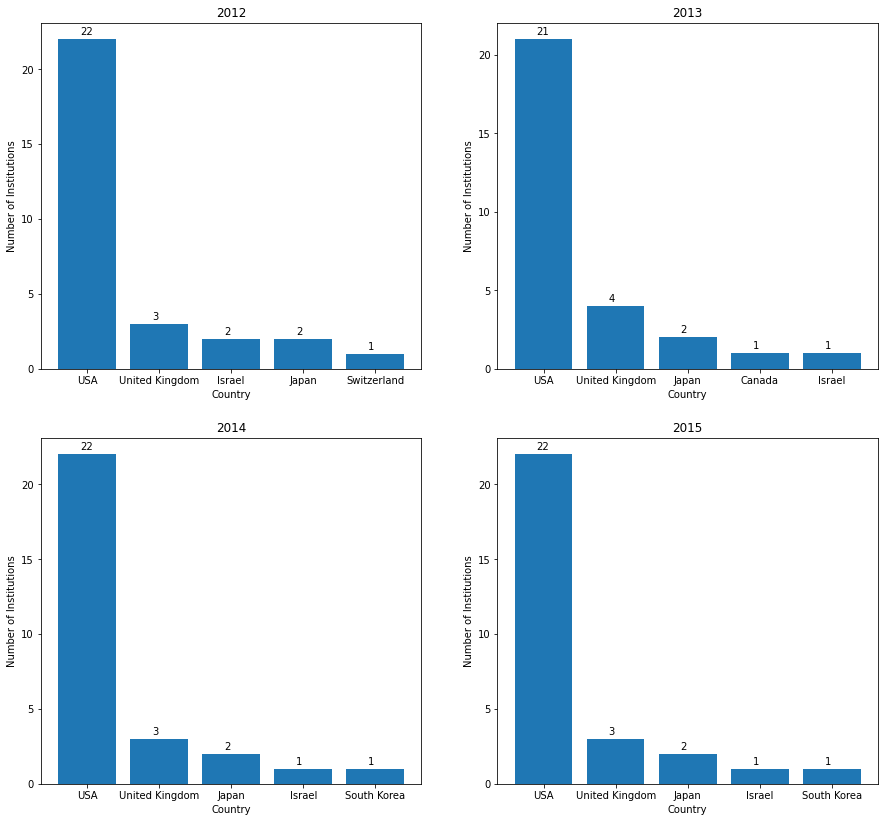

In [19]:
df_visualize_1 = df.to_frame().reset_index() # for plotting convenience

fig, ax = plt.subplots(2, 2, figsize=(15, 14))

def myPlot(index, year):
    ax = plt.subplot(2, 2, index+1)
    df_tmp = df_visualize_1[df_visualize_1['year']==year]

    plt.xticks(np.arange(0, 5, 1))
    plt.yticks(np.arange(0, 21, 5))
    plt.xlabel('Country')
    plt.ylabel('Number of Institutions')

    for i, v in enumerate(df_tmp['institution']):
        plt.text(i - 0.1, v + 0.3, str(v), color='black')

    plt.bar(df_tmp['country'], df_tmp['institution'])
    plt.title(year)

for index, year in enumerate(range(2012, 2016)):
    myPlot(index, year)
    
plt.show()

##### Result overview:
- Looking at the result above, we can see that over years (from 2012 to 2015), The United States of America is likely dominating other countries in the Center for World University Rankings itself. The USA's national language is English - a world popular language, so this is usually the prior choice of international students.

##### More facts about The United States of America:
- According to [International Education Specialists](https://www.idp.com/middleeast/study-in-usa/why-the-usa/?lang=en), the reasons why USA attract international students, besides the various academic criteria that can be draw from the ranking result above, It also:
    - Has an excellent support system for international students. The international student office helps students to get accustomed to a new kind of lifestyle – whether it is an academic query, cultural or social.
    - Is a melting plot of different cultures, races and ethnicities. Students from different regions are learning together making it a rich and stimulating education experience. The US will help you explore variety of cuisines, customs, festivals and art too.
    - Give students a lively and vibrant campus life. Irrespective of the university they study in, they will find themselves in the midst of new cultural experiences and the American way of life.

### According to Shanghai Ranking, how does public spending on higher education affect the average total score of each country in 2011?
We will cover these to answer the question:
- **Data that will be used and their expected data types**:
  - Dataset: **`shanghaiData.csv`**, **`school_and_country_table.csv`**, **`education_expenditure_supplementary_data.csv`**
  - Attributes and expected data types:
      - **`shanghaiData.csv`**: 
        - `university_name`: string
        - `total_score`: float
        - `alumni`: float
        - `award`: float
        - `hici`: float
        - `ns`: float
        - `pub`: float
        - `pcp`: float
        - `year`: int
      - **`school_and_country_table.csv`**: 
        - `school_name`: string
        - `country`: string
      - **`education_expenditure_supplementary_data.csv`**:
        - `country`: string
        - `institute_type`: string
        - `direct_expenditure_type`: string
        - `1995, 2000, 2005, 2009, 2010, 2011`: float
- **General steps**:
  - Preprocess the data
    - Detect and handle inappropriate data types in each table.
    - Detect and handle missing values in each table.
    - Detect and handle outliers in each table.
  - Analyze the data
    - Step by step fill the country into shanghaiData table.
    - Construct 2 data frames: top 5 country with highest score and top 5 country with highest spending.
    - Merge these 2 data frames into the corresponding table to get the answer for 2 subquestions.
    - Visualize the results.
  - Answer the question
    - Observe the result and answer the subquestions.      
#### Preprocess the data

##### **`shanghaiData.csv`**

In [20]:
sh_data.describe()

,total_score,alumni,award,hici,ns,pub,pcp,year
count,1101.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,4897.000000
mean,36.383470,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,2009.658566
std,13.557186,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,3.197576
min,23.500000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,2005.000000
25%,27.400000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,2007.000000
50%,31.300000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,2009.000000
75%,41.800000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,2012.000000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,2015.000000


We don't have any outliers here, so we can move on.

In [21]:
sh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


- As we mention before, the `world_rank` column's datatype looks <font color='red'>suspicious</font>. But we can skip  since we won't need it in this question.
- There are 4897 rows but only 4896 non-null in `university_name` column, there could be 1 blank row in the data, we can check this:

In [22]:
sh_data[sh_data['university_name'].isna()]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
3896,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013


- This row has no meaning, so we can drop it (i.e filter out all the rows that `university_name` is not null).

In [23]:
df = sh_data[sh_data['university_name'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4896 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4896 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 459.0+ KB


Great, now we just need the data in the year of `2011`, so we can filter out this first to speed up the process.

In [24]:
df = df[df['year']==2011]
df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
3014,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,2011
3015,2,Stanford University,2,72.6,41.2,78.4,88.4,70.2,70.3,48.6,2011
3016,3,Massachusetts Institute of Technology (MIT),3,72.0,72.8,81.9,67.9,70.6,60.6,63.7,2011
3017,4,"University of California, Berkeley",4,71.9,68.3,79.3,70.0,69.5,69.4,53.1,2011
3018,5,University of Cambridge,1,70.0,87.1,96.7,54.5,54.1,65.1,52.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
3509,401-500,Wuhan University,13-23,NaN,0.0,0.0,0.0,2.6,36.6,10.0,2011
3510,401-500,Xiamen University,13-23,NaN,0.0,0.0,0.0,8.9,32.9,11.6,2011
3511,401-500,Xian Jiao Tong University,13-23,NaN,0.0,0.0,0.0,5.0,39.2,14.2,2011
3512,401-500,Yamaguchi University,17-23,NaN,0.0,0.0,16.1,2.8,20.0,13.2,2011


There are a lot of missing values of `total_score` column, this can affect the result of this question. If we look at the non-null values of this column, we may ask ourselves a question, is there any relationship between `total_score` and the other scores (`alumni`, `award`, `hici`, `ns`, `pub`, `pcp`) columns?

In this case, we can use a Machine Learning algorithm - `Linear Regression` to answer this question.

In [25]:
from sklearn.linear_model import LinearRegression # import linear regression model from sklearn module

model = LinearRegression(fit_intercept=False) # create a linear regression model

Take out non-null values to use for the training set

In [26]:
df_train = df[df['total_score'].notna()]
df_train

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
3014,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,2011
3015,2,Stanford University,2,72.6,41.2,78.4,88.4,70.2,70.3,48.6,2011
3016,3,Massachusetts Institute of Technology (MIT),3,72.0,72.8,81.9,67.9,70.6,60.6,63.7,2011
3017,4,"University of California, Berkeley",4,71.9,68.3,79.3,70.0,69.5,69.4,53.1,2011
3018,5,University of Cambridge,1,70.0,87.1,96.7,54.5,54.1,65.1,52.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
3110,97,Case Western Reserve University,52,24.4,34.8,11.5,21.7,16.6,40.0,22.3,2011
3111,97,The University of Sheffield,10,24.4,20.4,14.1,21.0,18.7,43.6,21.8,2011
3112,97,Tohoku University,5,24.4,16.6,0.0,21.7,22.1,55.9,21.0,2011
3113,100,Texas A&M University - College Station,53,24.2,0.0,0.0,33.9,19.9,53.8,19.8,2011


Create train attributes and train labels, then fit it to the model

In [27]:
X_train = df_train.iloc[:, 4:10].to_numpy()
y_train = df_train.iloc[:, 3].to_numpy()

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

We get the model coefficients 

In [28]:
model.coef_

array([0.10265012, 0.20633751, 0.20650156, 0.2058194 , 0.20607246,
       0.10289785])

We can calculate total score based on other scores with the above coefficients, we will recalculate the whole table for faster process and because the results change slightly. We will use this rounded formula:

$total\_score = 0.1 \times alumni + 0.2 \times award + 0.2 \times hici + 0.2 \times ns + 0.2 \times pub + 0.1 \times pcp$

In [29]:
df['total_score'] = 0.1 * (df['alumni'] + df['pcp']) \
              + 0.2 * (df['award'] + df['hici'] + df['ns'] + df['pub'])
df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
3014,1,Harvard University,1,97.05,100.0,100.0,100.0,100.0,100.0,70.5,2011
3015,2,Stanford University,2,70.44,41.2,78.4,88.4,70.2,70.3,48.6,2011
3016,3,Massachusetts Institute of Technology (MIT),3,69.85,72.8,81.9,67.9,70.6,60.6,63.7,2011
3017,4,"University of California, Berkeley",4,69.78,68.3,79.3,70.0,69.5,69.4,53.1,2011
3018,5,University of Cambridge,1,67.99,87.1,96.7,54.5,54.1,65.1,52.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
3509,401-500,Wuhan University,13-23,8.84,0.0,0.0,0.0,2.6,36.6,10.0,2011
3510,401-500,Xiamen University,13-23,9.52,0.0,0.0,0.0,8.9,32.9,11.6,2011
3511,401-500,Xian Jiao Tong University,13-23,10.26,0.0,0.0,0.0,5.0,39.2,14.2,2011
3512,401-500,Yamaguchi University,17-23,9.10,0.0,0.0,16.1,2.8,20.0,13.2,2011


Lets see if there is still any NaN value in the `total_score` column after calculation.

In [30]:
df[df['total_score'].isna()].shape[0]

3

Looks like there are still 3 NaN values because one of the score is missing (NaN), so we can drop this since we have no way to fix.

In [31]:
df = df[df['total_score'].notna()]
df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
3014,1,Harvard University,1,97.05,100.0,100.0,100.0,100.0,100.0,70.5,2011
3015,2,Stanford University,2,70.44,41.2,78.4,88.4,70.2,70.3,48.6,2011
3016,3,Massachusetts Institute of Technology (MIT),3,69.85,72.8,81.9,67.9,70.6,60.6,63.7,2011
3017,4,"University of California, Berkeley",4,69.78,68.3,79.3,70.0,69.5,69.4,53.1,2011
3018,5,University of Cambridge,1,67.99,87.1,96.7,54.5,54.1,65.1,52.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
3509,401-500,Wuhan University,13-23,8.84,0.0,0.0,0.0,2.6,36.6,10.0,2011
3510,401-500,Xiamen University,13-23,9.52,0.0,0.0,0.0,8.9,32.9,11.6,2011
3511,401-500,Xian Jiao Tong University,13-23,10.26,0.0,0.0,0.0,5.0,39.2,14.2,2011
3512,401-500,Yamaguchi University,17-23,9.10,0.0,0.0,16.1,2.8,20.0,13.2,2011


##### **`school_and_country_table.csv`**

In [32]:
school_and_country

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America
...,...,...
813,Xidian University,China
814,Yeungnam University,South Korea
815,Yıldız Technical University,Turkey
816,Yokohama City University,Japan


There is a small inconsistent between the name of universities column, so we will rename it.

In [33]:
school_and_country = school_and_country.rename(columns={'school_name':'university_name'})
school_and_country

,university_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America
...,...,...
813,Xidian University,China
814,Yeungnam University,South Korea
815,Yıldız Technical University,Turkey
816,Yokohama City University,Japan


##### **`education_expenditure_supplementary_data.csv`**

We notice a small problem with `institute_type` column

In [34]:
for element in education_expenditure_data['institute_type'].unique():
    print(repr(element))

'All Institutions '
'Elementary and Secondary Institutions '
'Higher Education Institutions '


There are some redundant characters at the end of the string, we should strip it in prior.

In [35]:
education_expenditure_data['institute_type'] = \
                education_expenditure_data['institute_type'].apply(lambda s: s.strip())
                
for element in education_expenditure_data['institute_type'].unique():
    print(repr(element))

'All Institutions'
'Elementary and Secondary Institutions'
'Higher Education Institutions'


Great, our data are clean now, we can move on and analyze them

#### Analyze the data

Now to answer the question, we are still missing a column `country` in Shanghai data frame, we need to fix this.
First focus on the `university_name` column, we will get the unique values of this column because it will be more optimal in later process (matching universities and countries)

In [36]:
unique_universities = pd.DataFrame(df['university_name'].unique(), columns=['university_name'])
unique_universities

,university_name
0,Harvard University
1,Stanford University
2,Massachusetts Institute of Technology (MIT)
3,"University of California, Berkeley"
4,University of Cambridge
...,...
492,Wuhan University
493,Xiamen University
494,Xian Jiao Tong University
495,Yamaguchi University


Create a global university and country dictionary, after each process finish and a new data frame is created, add all of non-null (processed) values into the dictionary.

In [37]:
my_school_and_country_dict = {}

Now we can merge the *unique_universities* with the *school_country* data above to get the country of each university, the `how` parameter show be ***left*** because there may be universities not in school_and_country data, we want this to be NaN.

In [38]:
df_merged = unique_universities.merge(school_and_country, how="left")

# store the filled data into dictionary
my_school_and_country_dict.update( \
    df_merged[df_merged['country'].notna()].set_index('university_name').to_dict()['country'])
    
df_merged

,university_name,country
0,Harvard University,United States of America
1,Stanford University,United States of America
2,Massachusetts Institute of Technology (MIT),NaN
3,"University of California, Berkeley",United States of America
4,University of Cambridge,United Kingdom
...,...,...
492,Wuhan University,China
493,Xiamen University,China
494,Xian Jiao Tong University,NaN
495,Yamaguchi University,NaN


How many universities do not have their country after merging?

In [39]:
df_merged[df_merged['country'].isna()]

,university_name,country
2,Massachusetts Institute of Technology (MIT),NaN
16,"University of California, San Francisco",NaN
17,The Johns Hopkins University,NaN
18,University of Wisconsin - Madison,NaN
20,The University of Tokyo,NaN
...,...,...
484,University of Wisconsin - Milwaukee,NaN
487,University of Zagreb,NaN
491,Vrije University Brussel,NaN
494,Xian Jiao Tong University,NaN


- There are still 192 universities of which country is missing. If we look for these university in the *school_and_country* data once again, we can see most of these are in different orders, or there are some additional words in the name.

Now, there are a lot of modules to help us fix this (e.g Regex), but after testing, we found out using module called *thefuzz* is very effective, it is a Python module that supports matching strings.

In [40]:
from thefuzz import fuzz
from thefuzz import process

We create a dictionary to store universities and its corresponding countries according to *school_and_country* data

In [41]:
school_and_country_dict = school_and_country.set_index('university_name').to_dict()['country']
schools = school_and_country_dict.keys()

We compare each university name in the merged data with each university in *school_and_country* data. If the score is over 80 (calculated by thefuzz), we store the `country` corresponding to that `university_name`.

In [42]:
def compare(s, min_score):
    university_name, score = process.extractOne(s, schools, scorer=fuzz.token_set_ratio)
    if score >= min_score:
        return school_and_country_dict[university_name]

    return np.nan

After testing all scorers (supported by *thefuzz*), we decide to use `scorer=token_set_ratio` because this score is likely the most effective in our case.

In [43]:
df_thefuzz = df_merged[df_merged['country'].isna()].copy()
df_thefuzz['country'] = df_thefuzz['university_name'].apply(lambda s: compare(str(s), 80))

# store the filled data into dictionary
my_school_and_country_dict.update( \
    df_thefuzz[df_thefuzz['country'].notna()].set_index('university_name').to_dict()['country'])

df_thefuzz

,university_name,country
2,Massachusetts Institute of Technology (MIT),United States of America
16,"University of California, San Francisco",United States of America
17,The Johns Hopkins University,United States of America
18,University of Wisconsin - Madison,United States of America
20,The University of Tokyo,Japan
...,...,...
484,University of Wisconsin - Milwaukee,United States of America
487,University of Zagreb,Turkey
491,Vrije University Brussel,Belgium
494,Xian Jiao Tong University,China


Do we still have any unfilled values?

In [44]:
df_thefuzz[df_thefuzz['country'].isna()]

,university_name,country
102,Baylor College of Medicine,NaN
109,Mayo Medical School,NaN
161,Mount Sinai School of Medicine,NaN
321,Industrial Physics and Chemistry Higher Educat...,NaN
411,Ecole National Superieure Mines - Paris,NaN
416,Hannover Medical School,NaN
426,London School of Hygiene and Tropical Medicine,NaN


- There are still 7 NaN values, because these university name does not exist in *school_and_country* data, so how can we fill these? The number of values is not too large, so we can do it manually by asking ***Google***.

In [45]:
df_processed = df_thefuzz[df_thefuzz['country'].isna()].copy()

def country_fill(name, country):
    df_processed.loc[df_processed['university_name'] == name, ['country']] = country

country_fill("Baylor College of Medicine", "United States of America")
country_fill("Mayo Medical School", "United States of America")
country_fill("Mount Sinai School of Medicine", "United States of America")
country_fill("Ecole National Superieure Mines - Paris", "France")
country_fill("Industrial Physics and Chemistry Higher Educational Institution - Paris", "France")
country_fill("London School of Hygiene and Tropical Medicine", "United Kingdom")
country_fill("Hannover Medical School", "Germany")

# store the filled data into dictionary
my_school_and_country_dict.update( \
    df_processed.set_index('university_name').to_dict()['country'])

df_processed

,university_name,country
102,Baylor College of Medicine,United States of America
109,Mayo Medical School,United States of America
161,Mount Sinai School of Medicine,United States of America
321,Industrial Physics and Chemistry Higher Educat...,France
411,Ecole National Superieure Mines - Paris,France
416,Hannover Medical School,Germany
426,London School of Hygiene and Tropical Medicine,United Kingdom


After getting all of the countries ready (stored in my_school_and_country_dict), we fill it in a new `country` column, we should do this with a temporary data frame, or else it will raise <font color='red'>SettingWithCopyWarning</font>

In [46]:
df.reset_index(drop=True,inplace=True)
tmp = df.copy()
tmp['country'] = df['university_name'].apply(lambda s: my_school_and_country_dict[s])
df = tmp
df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country
0,1,Harvard University,1,97.05,100.0,100.0,100.0,100.0,100.0,70.5,2011,United States of America
1,2,Stanford University,2,70.44,41.2,78.4,88.4,70.2,70.3,48.6,2011,United States of America
2,3,Massachusetts Institute of Technology (MIT),3,69.85,72.8,81.9,67.9,70.6,60.6,63.7,2011,United States of America
3,4,"University of California, Berkeley",4,69.78,68.3,79.3,70.0,69.5,69.4,53.1,2011,United States of America
4,5,University of Cambridge,1,67.99,87.1,96.7,54.5,54.1,65.1,52.0,2011,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
492,401-500,Wuhan University,13-23,8.84,0.0,0.0,0.0,2.6,36.6,10.0,2011,China
493,401-500,Xiamen University,13-23,9.52,0.0,0.0,0.0,8.9,32.9,11.6,2011,China
494,401-500,Xian Jiao Tong University,13-23,10.26,0.0,0.0,0.0,5.0,39.2,14.2,2011,China
495,401-500,Yamaguchi University,17-23,9.10,0.0,0.0,16.1,2.8,20.0,13.2,2011,Turkey


Just to make sure that no NaN country

In [47]:
df[df['country'].isna()]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country


Next, we will construct the top 5 score table, we group by the `country` and get the mean `total_score` of each country, also reset the index to make it a data frame.

In [48]:
df_scores = df.groupby('country')['total_score'].mean().reset_index() 
df_scores.head()

,country,total_score
0,Australia,15.774737
1,Austria,12.708750
2,Belgium,16.100000
3,Brazil,12.602857
4,Canada,17.365000


Then we get the top 5 countries with largest average score.

In [49]:
df_top_5_scores = df_scores.nlargest(5, 'total_score')
df_top_5_scores = df_top_5_scores.rename(columns={'total_score':'average_total_score'}) # for prettier look
df_top_5_scores

,country,average_total_score
36,Switzerland,25.224286
40,United States of America,23.633219
8,Denmark,22.415000
39,United Kingdom,21.337027
22,Netherlands,19.626667


Now construct the top 5 expenditure on education. We filter out the rows that have both `Public` and `Higher Education Institutions` values.

In [50]:
df_expenditure = education_expenditure_data.copy()
df_expenditure = df_expenditure[(df_expenditure['direct_expenditure_type'] == 'Public') \
                         & (df_expenditure['institute_type'] == 'Higher Education Institutions')]
df_expenditure.head()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN


The question needs data in year `2011`, but some are missing.
After observing the non-null values in 2011, we see that the difference between 2 years are trivial. So we will estimate `2011` using data from previous years (front fill).

In [51]:
df_expenditure['2011'] = education_expenditure_data.iloc[:, 3:9].fillna(axis=1, method='ffill')['2011']
df_expenditure.head()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,1.6


Fortunately all values are filled, so we can filter the columns (`country`, `2011`) we need.

In [52]:
df_expenditure = df_expenditure[df_expenditure['2011'].notna()]
df_expenditure = df_expenditure.loc[:, ['country', '2011']] # for easier look
df_expenditure.head()

,country,2011
74,OECD Average,1.1
75,Australia,0.7
76,Austria,1.4
77,Belgium,1.3
78,Canada,1.6


Now we can get the top 5 countries that have the largest public expenditure on higher education.

In [53]:
df_top_5_expenditure = df_expenditure.nlargest(5, ['2011']).reset_index(drop=True) # for prettier look
df_top_5_expenditure

,country,2011
0,Finland,1.9
1,Denmark,1.8
2,Canada,1.6
3,Norway,1.6
4,Sweden,1.6


##### Sub question 1: What are top 5 countries with highest average score and their public expenditure on higher education?

We then merge the *top 5 scores* with *expenditure data* frame to get the education expenditure of top 5 highest score countries.

In [54]:
df_top_5_scores.merge(df_expenditure)

,country,average_total_score,2011
0,Switzerland,25.224286,1.3
1,Denmark,22.415000,1.8
2,United Kingdom,21.337027,0.9
3,Netherlands,19.626667,1.3


Wait, where is the United States of America?, if we look at the *education_expenditure* again:

In [55]:
df_expenditure.tail(3)

,country,2011
108,United States,0.9
109,Brazil,0.9
110,Russian Federation,0.9


The United States of America in the *top 5 scores* data is actually the United States in *education expenditure* data. Fortunately, there are no other exception so we can fix this just by replacing string.

In [56]:
df_top_5_scores['country'] = df_top_5_scores['country'].replace('United States of America', 'United States')
df_top_5_scores

,country,average_total_score
36,Switzerland,25.224286
40,United States,23.633219
8,Denmark,22.415000
39,United Kingdom,21.337027
22,Netherlands,19.626667


We now can merge the *top 5 scores* with *expenditure* data frame to get the education expenditure of top 5 highest score countries.

In [57]:
df_top_5_scores = df_top_5_scores.merge(df_expenditure)
df_top_5_scores

,country,average_total_score,2011
0,Switzerland,25.224286,1.3
1,United States,23.633219,0.9
2,Denmark,22.415000,1.8
3,United Kingdom,21.337027,0.9
4,Netherlands,19.626667,1.3


##### Sub question 2: What are top 5 countries in public expenditure on higher education and their average score?

To get the top 5 in education expenditure countries' score, we merge the *top 5 expenditure* data with *scores* data. 

In [58]:
df_top_5_expenditure = df_top_5_expenditure.merge(df_scores)
df_top_5_expenditure.rename(columns={'total_score':'average_total_score'}, inplace=True) # for tables consistency
df_top_5_expenditure

,country,2011,average_total_score
0,Finland,1.9,14.120000
1,Denmark,1.8,22.415000
2,Canada,1.6,17.365000
3,Norway,1.6,16.450000
4,Sweden,1.6,18.320909


#### Visualize the result

We plot the scores of 2 tables first

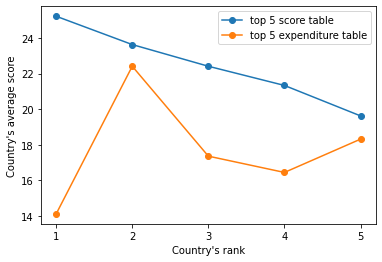

In [61]:
plt.plot(['1','2','3','4','5'], df_top_5_scores['average_total_score'],marker='o')
plt.plot(['1','2','3','4','5'], df_top_5_expenditure['average_total_score'],marker='o')
plt.legend(['top 5 score table', 'top 5 expenditure table'])
plt.xlabel('Country\'s rank')
plt.ylabel('Country\'s average score')
plt.show()

Then the 2011 expenditure:

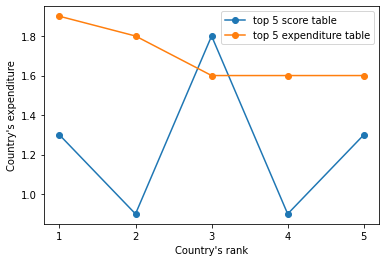

In [62]:
plt.plot(['1','2','3','4','5'], df_top_5_scores['2011'],marker='o')
plt.plot(['1','2','3','4','5'], df_top_5_expenditure['2011'],marker='o')
plt.legend(['top 5 score table', 'top 5 expenditure table'])
plt.xlabel('Country\'s rank')
plt.ylabel('Country\'s expenditure')
plt.show()

##### A general observation:

- From visualization above, we can see that:
    - From the first plot, we can see the country which is in top 5 expenditure on higher education, their average score is completely lying under the top 5 score ones. May be spending more on education leads to a worst average score?
    - However, if we look at the second plot, there are no relationship between the expenditure of top 5 score countries and top 5 expenditure countries.

$\rightarrow$ According to Shanghai Rankings, looks like spending more on higher education does not affect much on average score. But how about Denmark?

##### An interesting fact about Denmark:
- Denmark takes place in both above tables, what information can be drawn from this?
- Based on the description of data on [kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings?select=shanghaiData.csv), `Shanghai Ranking` has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.
- According to the section  `PREPARING STUDENTS FOR THE FUTURE: HIGH ENROLMENT BUT LOW
COMPLETION IN VOCATIONAL EDUCATION AND TRAINING
` in [Denmark country profile by OECD](https://www.oecd.org/education/EDUCATION%20POLICY%20OUTLOOK%20DENMARK_EN.pdf): Tertiary education is free for students and there is a generous student loan system for living expenses.
Higher education lasts for around four years for a professional bachelor’s degree which prepares students for
specific professions, such as nursing, social work or journalism. A longer cycle is provided in universities, which
conduct research and offer research-based education. University graduation rates are higher in Denmark (50%)
than the OECD average (40%)
- In conclusion <br>
$\rightarrow$ Denmark gives their students all the best opportunities to do research. So with the Shanghai Ranking table, it will of course take a huge advantage about all the scores. 

## Reflection

`Trinh` <br>
- Some difficulties I have encountered:
    - Difficulties with the inconsistency of school_and_country_table.csv with the shanghaiData.csv. Took time to choose the effective preprocessing method.
    - Difficulties in asking meaningful question, especially when I keep thinking about the easy ones. Took time to think of a "hard" question.
    - Difficulties when preprocessing, a lot of invalid values were found, it was hard to choose the meaningful values to fill all of that.
- Things I have learned:
    - The most important thing I have learned is the group working process in a data science project, we plan detailed about everything before beginning working.
    - I have also learned a lot about the preprocessing method such as: filling NaN values, dealing with inconsistent data, and some useful other techniques.
    - I have also figured out how necessary organizing a data science project is. Therefore, spending more time in writing code clearly and explaining thoroughly are never a time-consuming activity.

If we had more time:
- There are some preprocess sections in the project that we could think of a more effective way to finish. But we did not have enough time to test them all.
- We would search for the effective way to fill the missing values in some dataframes instead of dropping them.
- Our answer to the questions are not perfect, we could do more research to give more information, evidences, knowledge as things that support our answers.